# ✏️ Esercizi

Per questi esercizi, useremo i dati tratti da [O'Connell, et al. (2021)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244974). Reduced social distancing during the COVID-19 pandemic is associated with antisocial behaviors in an online United States sample. PLoS ONE.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

import pymc as pm
import bambi as bmb
import arviz as az

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 123
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

Questo studio ha valutato se i comportamenti di distanziamento sociale (all'inizio della pandemia di COVID-19) fossero associati a comportamenti antisociali auto-riferiti. Per misurare un indice del comportamento di distanziamento sociale, ai partecipanti è stata presentata un'immagine di una sagoma di adulto circondata da un bordo rettangolare. È stato chiesto loro di cliccare su un punto nell'immagine che rappresentasse a che distanza solitamente si trovavano dalle altre persone.

Qui è presente una *heatmap* che mostra a che distanza i partecipanti hanno riportato di stare dalle altre persone nell'ultima settimana, con un colore marrone scuro che indica una maggiore densità di risposte. La coordinata della risposta media, indicata con un +, rappresenta una distanza di circa 98 pollici (2.5 metri).

![Figura 1](https://journals.plos.org/plosone/article/figure/image?download&size=medium&id=info:doi/10.1371/journal.pone.0244974.g001)

Leggiamo i dati riportati dagli autori. 

In [3]:
df = pd.read_csv("../data/stab.csv")

VSCode tronca l'output stampato sullo schermo. Per elencare tutte le colonne uso la funzione `to_string` che però si applica solo ai DataFrame.

In [4]:
cols = df.columns

mydf = pd.DataFrame()
mydf["cols"] = cols
print(mydf["cols"].to_string()) 

0                                 subID
1                          mturk_randID
2                     suspect_itaysisso
3                               Country
4                                Region
5                                   ISP
6                                loc_US
7                             loc_state
8                           loc_zipcode
9                            loc_County
10                   loc_2010population
11                       loc_Land_Sq_Mi
12                  loc_Density_Sq_Mile
13         loc_Covid_Cases_april_1_2020
14                                attn1
15                                attn2
16                                attn3
17                            StartDate
18                              EndDate
19                             Duration
20                           worry_self
21                          likely_self
22                          health_self
23                      likely_lovedone
24                      health_lovedone


## Esercizio 1

**a** 
Trovare il numero di righe e di colonne del DataFrame.

In [5]:
df.shape

(131, 126)

(a) Selezionare le colonne "silhouette_dist_X_min81", rinominandola come "distance", "STAB_total", rinominandola come "stab", e "times_left_house_pastweek", rinominandola come "times_left_house". Calcolare il numero di elementi in ciascuno di questi vettori. (b) Utilizzando un ciclo for o una list comprehension, individuare gli indici delle righe in cui la variabile "distance" presenta un valore mancante. (c) Scrivere una funzione che accetti una lista come input e restituisca il conteggio di valori NaN presenti nella lista, fornendo commenti per ciascun passaggio del codice. Sfruttare la proprietà degli NaN secondo cui non sono uguali a se stessi. 

In [6]:
value = np.nan
print(value)

nan


In [7]:
value == value

False

Testare la funzione sulle liste "distance", "stab" e "times_left_house". (d) Creare una lista di 10 elementi contenente 5 numeri, 2 stringhe e 3 valori NaN. Testare la funzione creata su questa lista. (e) Creare un DataFrame con le variabili "distance", "stab" e "times_left_house". Filtrare il DataFrame in modo da escludere dati mancanti. (f) Utilizzando Seaborn, creare un istogramma con KDE sovrapposto per le variabili "times_left_house" e "stab". Interpretare i grafici. (g) Aggiungere al DataFrame la variabile "is_high_stab", che assume valore 1 se "stab" è minore o uguale a 80 e 0 altrimenti. Generare due violin-plot, uno per ciascuna modalità di "is_high_stab", per la variabile "times_left_house". Commentare i risultati. (h) Calcolare la media, la moda, la deviazione standard e la Deviazione Assoluta dalla Media (MAD) per i due gruppi.

In [8]:
distance = df["silhouette_dist_X_min81"]
stab = df["STAB_total"]
times_left_house = df["times_left_house_pastweek"]

In [9]:
len(distance)

131

In [10]:
len(stab)

131

**b**

In [11]:
nan_indices = [i for i in range(len(distance)) if np.isnan(distance[i])]
print(f"Observations with NaN values: {nan_indices}")

Observations with NaN values: [17, 22, 24, 25, 39, 51, 60, 67, 71, 94]


**c**

In [12]:
def count_nans(data_list):
    """Count the number of NaNs in a list

    Args:
        data_list (list): A list that contains the observations
    
    Returns:
        int: The number of NaNs found in the list
    """
    nan_count = 0
    
    for value in data_list:
        if value != value:  
            nan_count += 1
        
    return nan_count

In [13]:
count_nans(distance)

10

In [14]:
count_nans(stab)

0

In [15]:
count_nans(times_left_house)

0

**d**

In [16]:
new_list = [1, np.nan, 2, 3, np.nan, 4, 5, np.nan, "qualcosa", "qualcosa d'altro"]
print(new_list)

[1, nan, 2, 3, nan, 4, 5, nan, 'qualcosa', "qualcosa d'altro"]


In [17]:
count_nans(new_list)

3

**e**

In [18]:
new_df = pd.DataFrame()
new_df["distance"] = distance
new_df["stab"] = stab
new_df["times_left_house"] = times_left_house
new_df["subID"] = df["subID"]

new_df.head()

,distance,stab,times_left_house,subID
0,441.0,51,3,1001
1,287.0,94,5,1002
2,313.0,95,4,1003
3,452.0,45,2,1004
4,297.0,37,0,1005


In [19]:
new_df.shape

(131, 4)

In [20]:
df_cleaned = new_df.dropna()
df_cleaned.shape

(121, 4)

**f**

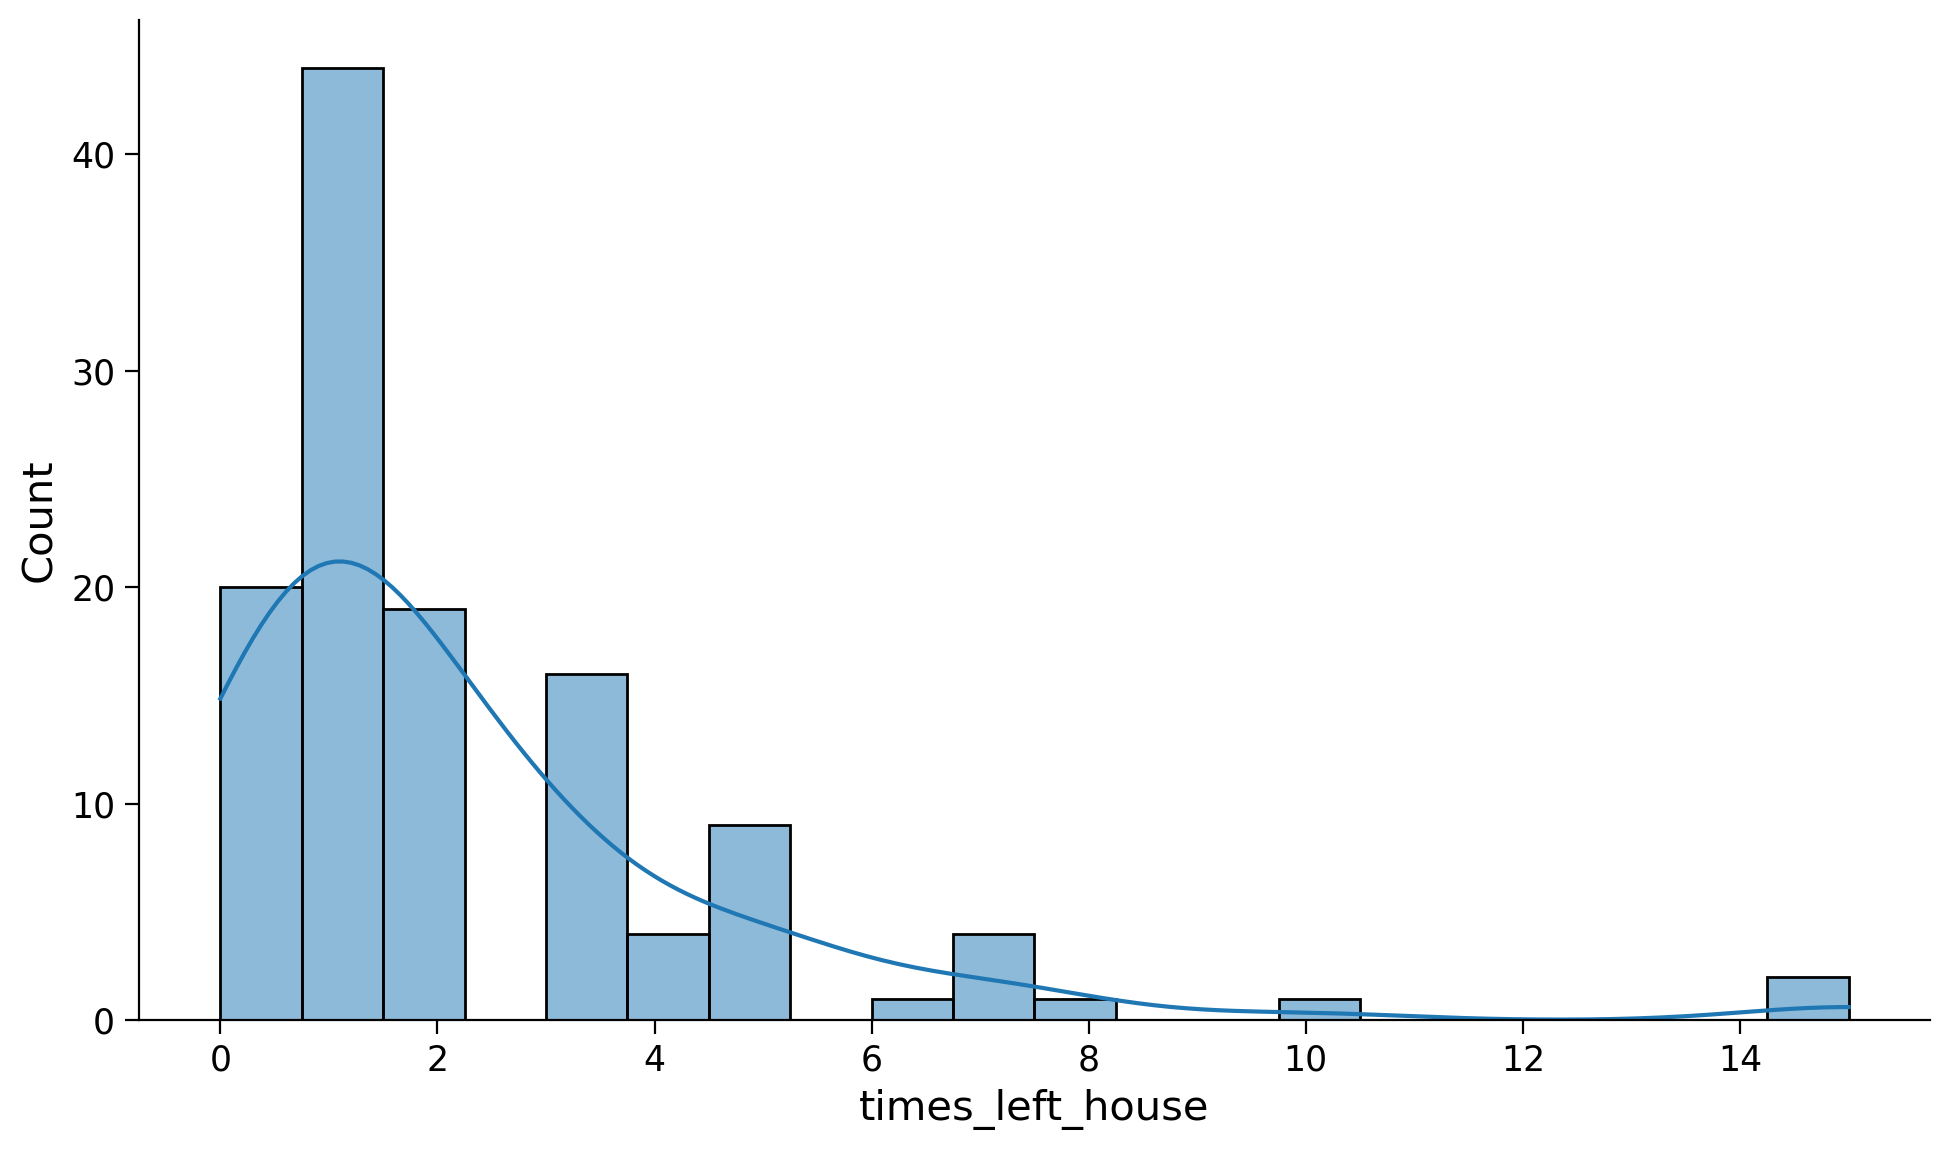

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='times_left_house', bins=20, kde=True);

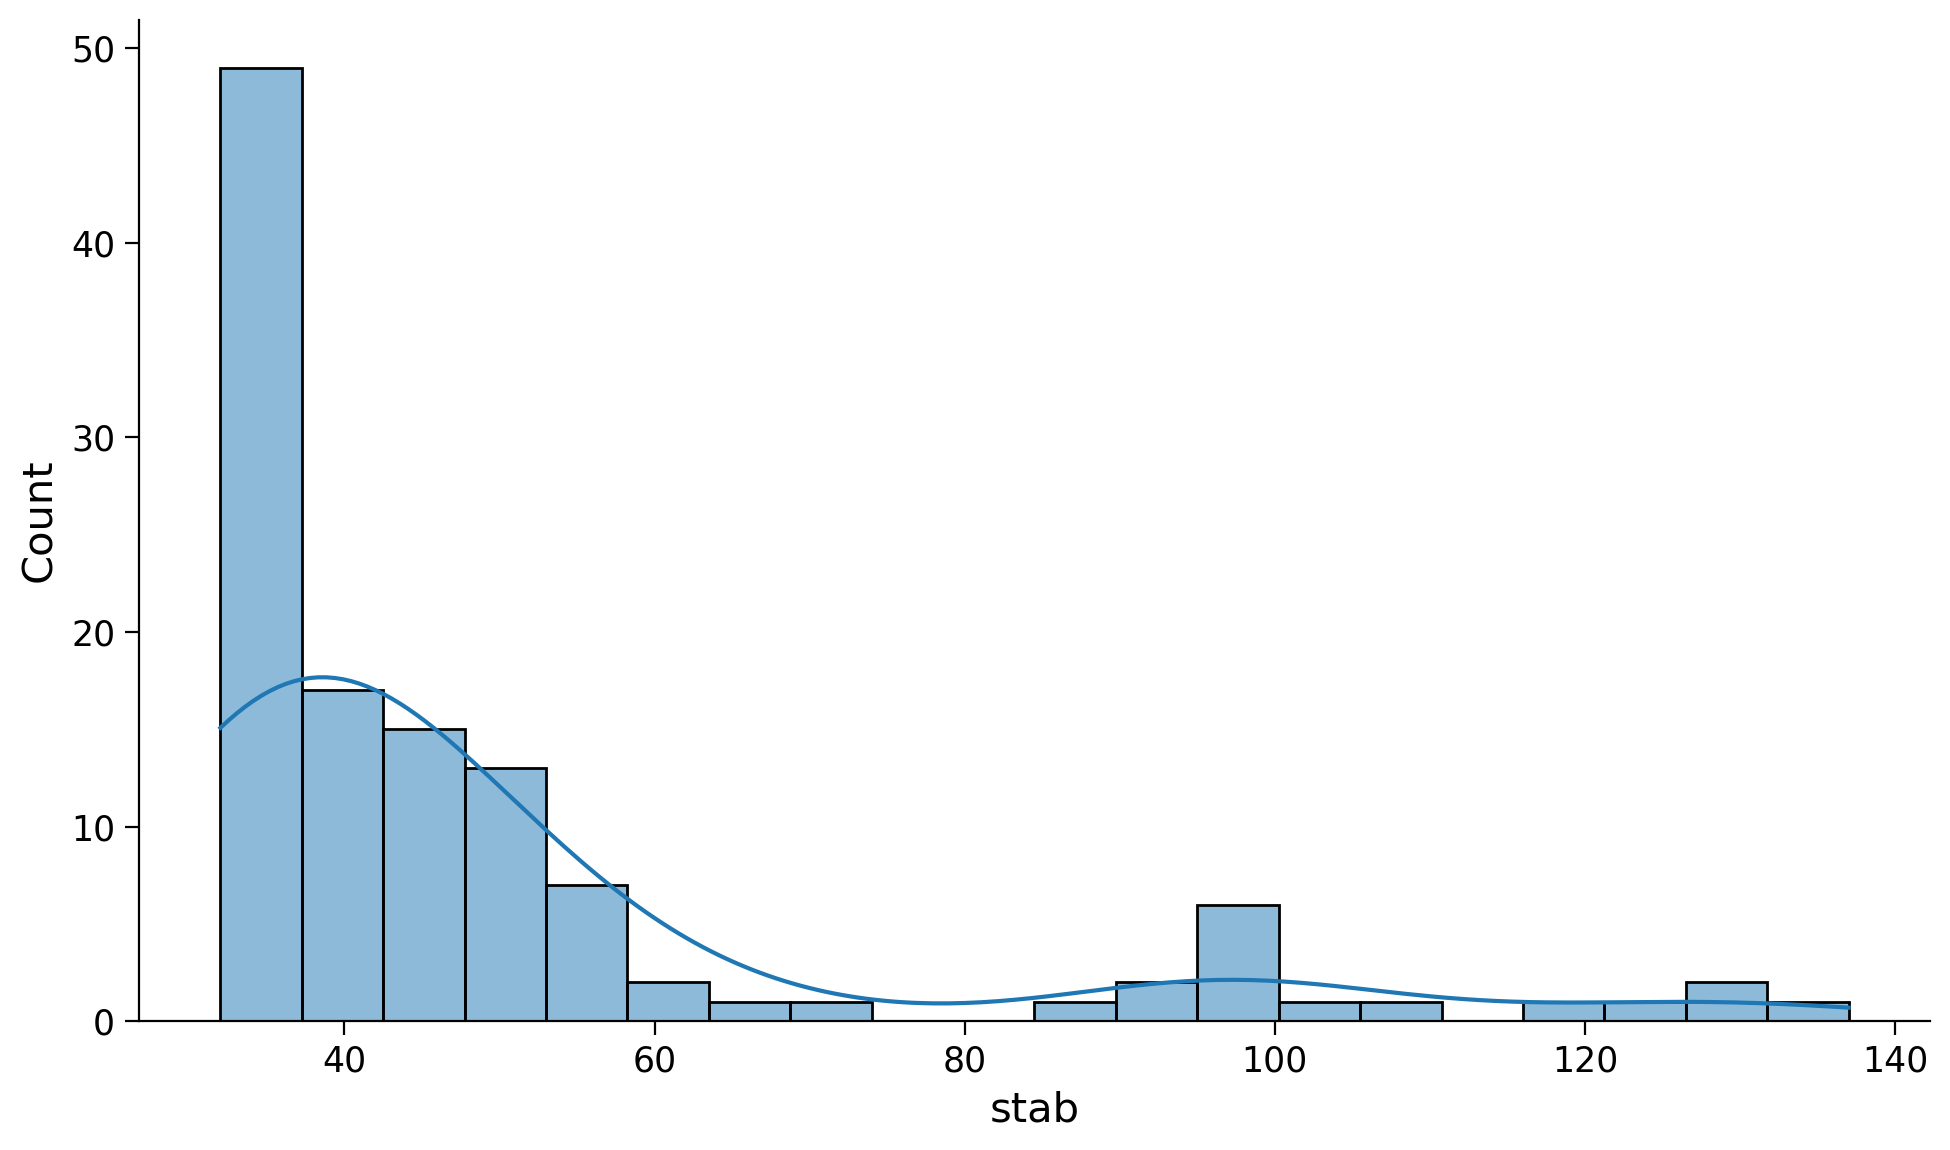

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='stab', bins=20, kde=True);

**g**

Gli autori stanno indagando la possibile associazione tra il numero di volte in cui le persone sono uscite di casa durante la fase iniziale della pandemia di COVID-19 e la loro propensione antisociale, valutata tramite il reattivo STAB (Antisocial Behavior Score). A tal fine, i partecipanti sono stati classificati in due categorie distinte: coloro che mostrano livelli antisociali elevati (con un punteggio STAB superiore a 80) e coloro che presentano livelli antisociali bassi (con un punteggio STAB inferiore o uguale a 80).

Per analizzare questa associazione, si produca una visualizzazione grafica dei dati per i due gruppi di partecipanti. Ad esempio, potrebbe essere utile un istogramma o un violin plot che mostri la distribuzione del numero di volte in cui i partecipanti sono usciti di casa, separando i dati in base ai livelli antisociali (alti o bassi). Si interpreti.

In [23]:
df_cleaned["is_high_stab"] = np.where(df_cleaned["stab"] > 80, 1, 0);

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_14258/262644604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["is_high_stab"] = np.where(df_cleaned["stab"] > 80, 1, 0);


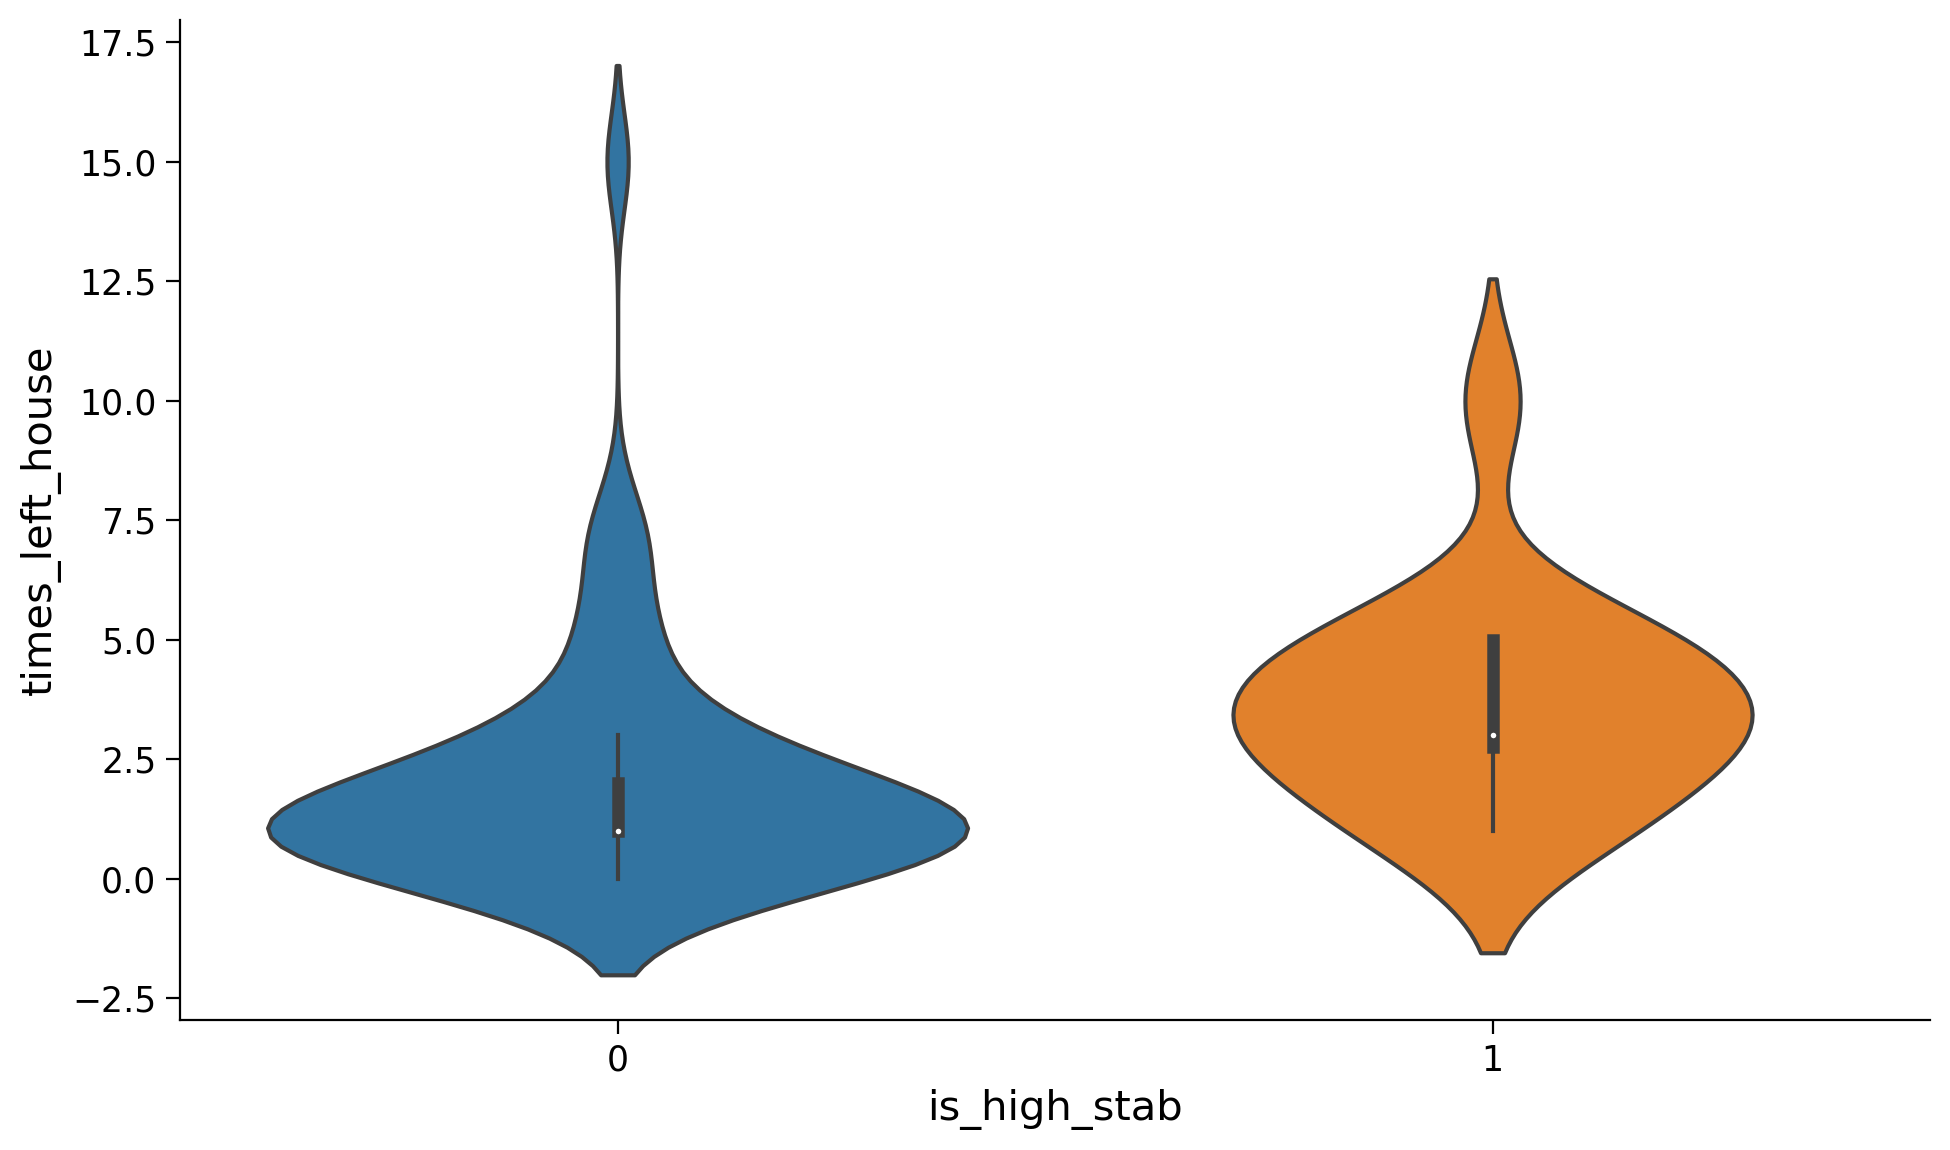

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="is_high_stab", y="times_left_house", data=df_cleaned);

In [25]:
y1 = df_cleaned[df_cleaned["is_high_stab"] == 1]["times_left_house"]
y0 = df_cleaned[df_cleaned["is_high_stab"] == 0]["times_left_house"]

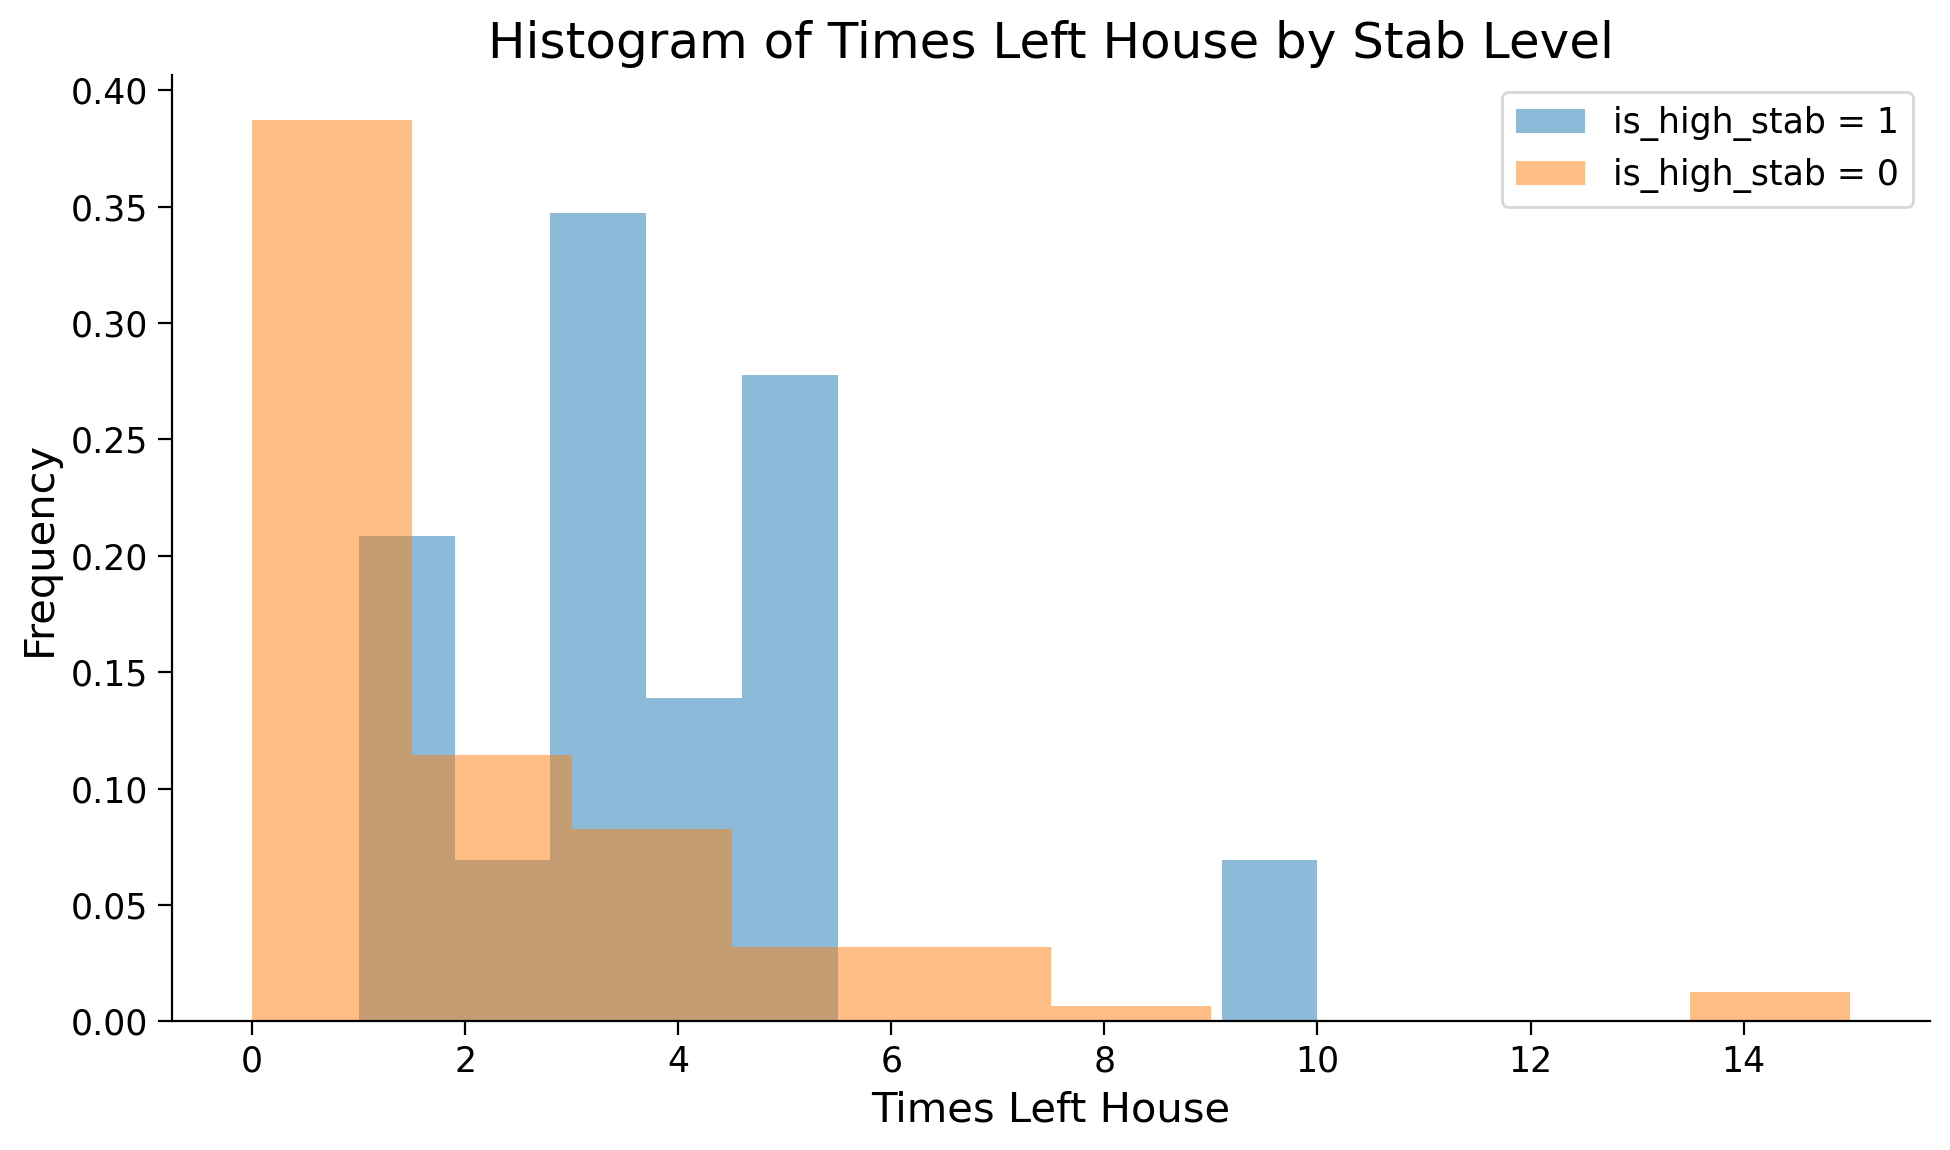

In [26]:
plt.figure(figsize=(10, 6))
# Plot the histogram for y1
plt.hist(y1, alpha=0.5, label='is_high_stab = 1', density=True, bins=10)
# Plot the histogram for y0
plt.hist(y0, alpha=0.5, label='is_high_stab = 0', density=True, bins=10)

plt.title('Histogram of Times Left House by Stab Level')
plt.xlabel('Times Left House')
plt.ylabel('Frequency')
plt.legend();

**h**

Si calcolino le statistiche descrittive per i due gruppi di partecipanti e si interpreti.

In [27]:
grouped = df_cleaned.groupby("is_high_stab")["times_left_house"]
summary_stats = grouped.agg(median=np.median, mean=np.mean, mad=sm.robust.scale.mad, std=np.std)
print("Summary statistics per group:\n", summary_stats)

Summary statistics per group:
               median      mean       mad       std
is_high_stab                                      
0                1.0  2.047619  1.482602  2.547174
1                3.0  3.625000  2.223903  2.217356


**i**

Si replichino i risultati degli autori usando `bambi`. Si utilizzi la distribuzione *negative binomial*, come nell'articolo.

Una distribuzione binomiale negativa è una distribuzione di probabilità discreta che è un'estensione della distribuzione di Poisson. Mentre la distribuzione di Poisson è utile per modellare il numero di eventi che accadono in un intervallo di tempo o spazio fisso, la distribuzione binomiale negativa permette una maggiore flessibilità, in particolare quando i dati presentano una varianza maggiore rispetto alla media (fenomeno chiamato sovradispersione).

La distribuzione binomiale negativa è descritta da due parametri, $ r $ e $ p $, e può essere pensata come il numero di fallimenti necessari per raggiungere $ r $ successi in una sequenza di prove di Bernoulli indipendenti, dove ogni prova ha probabilità di successo $ p $. La funzione di massa di probabilità (PMF) per la distribuzione binomiale negativa è data da:

$$P(X = k) = \binom{k + r - 1}{k} p^r (1-p)^k$$

dove
- $ k $ è il numero di fallimenti,
- $ r $ è il numero fisso di successi (chiamato anche numero di successi target),
- $ p $ è la probabilità di successo in ogni prova.

La media e la varianza della distribuzione binomiale negativa sono date rispettivamente da:

$$ \mu = \frac{r(1-p)}{p} $$

$$ \sigma^2 = \frac{r(1-p)}{p^2} $$

La distribuzione binomiale negativa è spesso utilizzata nella modellazione di dati di conteggio in cui si osserva una sovradispersione, come ad esempio il numero di incidenti in un determinato periodo, o il numero di volte che una particolare malattia si verifica in una popolazione.

Nel contesto dei modelli lineari generalizzati (GLM), la distribuzione binomiale negativa può essere usata come distribuzione di risposta con una funzione di collegamento logaritmica per modellare i dati di conteggio sovradispersi. Questo può aiutare a ottenere stime più accurate e un miglior adattamento del modello rispetto all'utilizzo di una distribuzione di Poisson, che assume uguaglianza tra media e varianza.

In [28]:
model = bmb.Model(
    "times_left_house ~ is_high_stab", df_cleaned, family="negativebinomial"
)

In [29]:
fitted = model.fit(
    draws=2000,
    idata_kwargs={"log_likelihood": True},
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [times_left_house_alpha, Intercept, is_high_stab]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


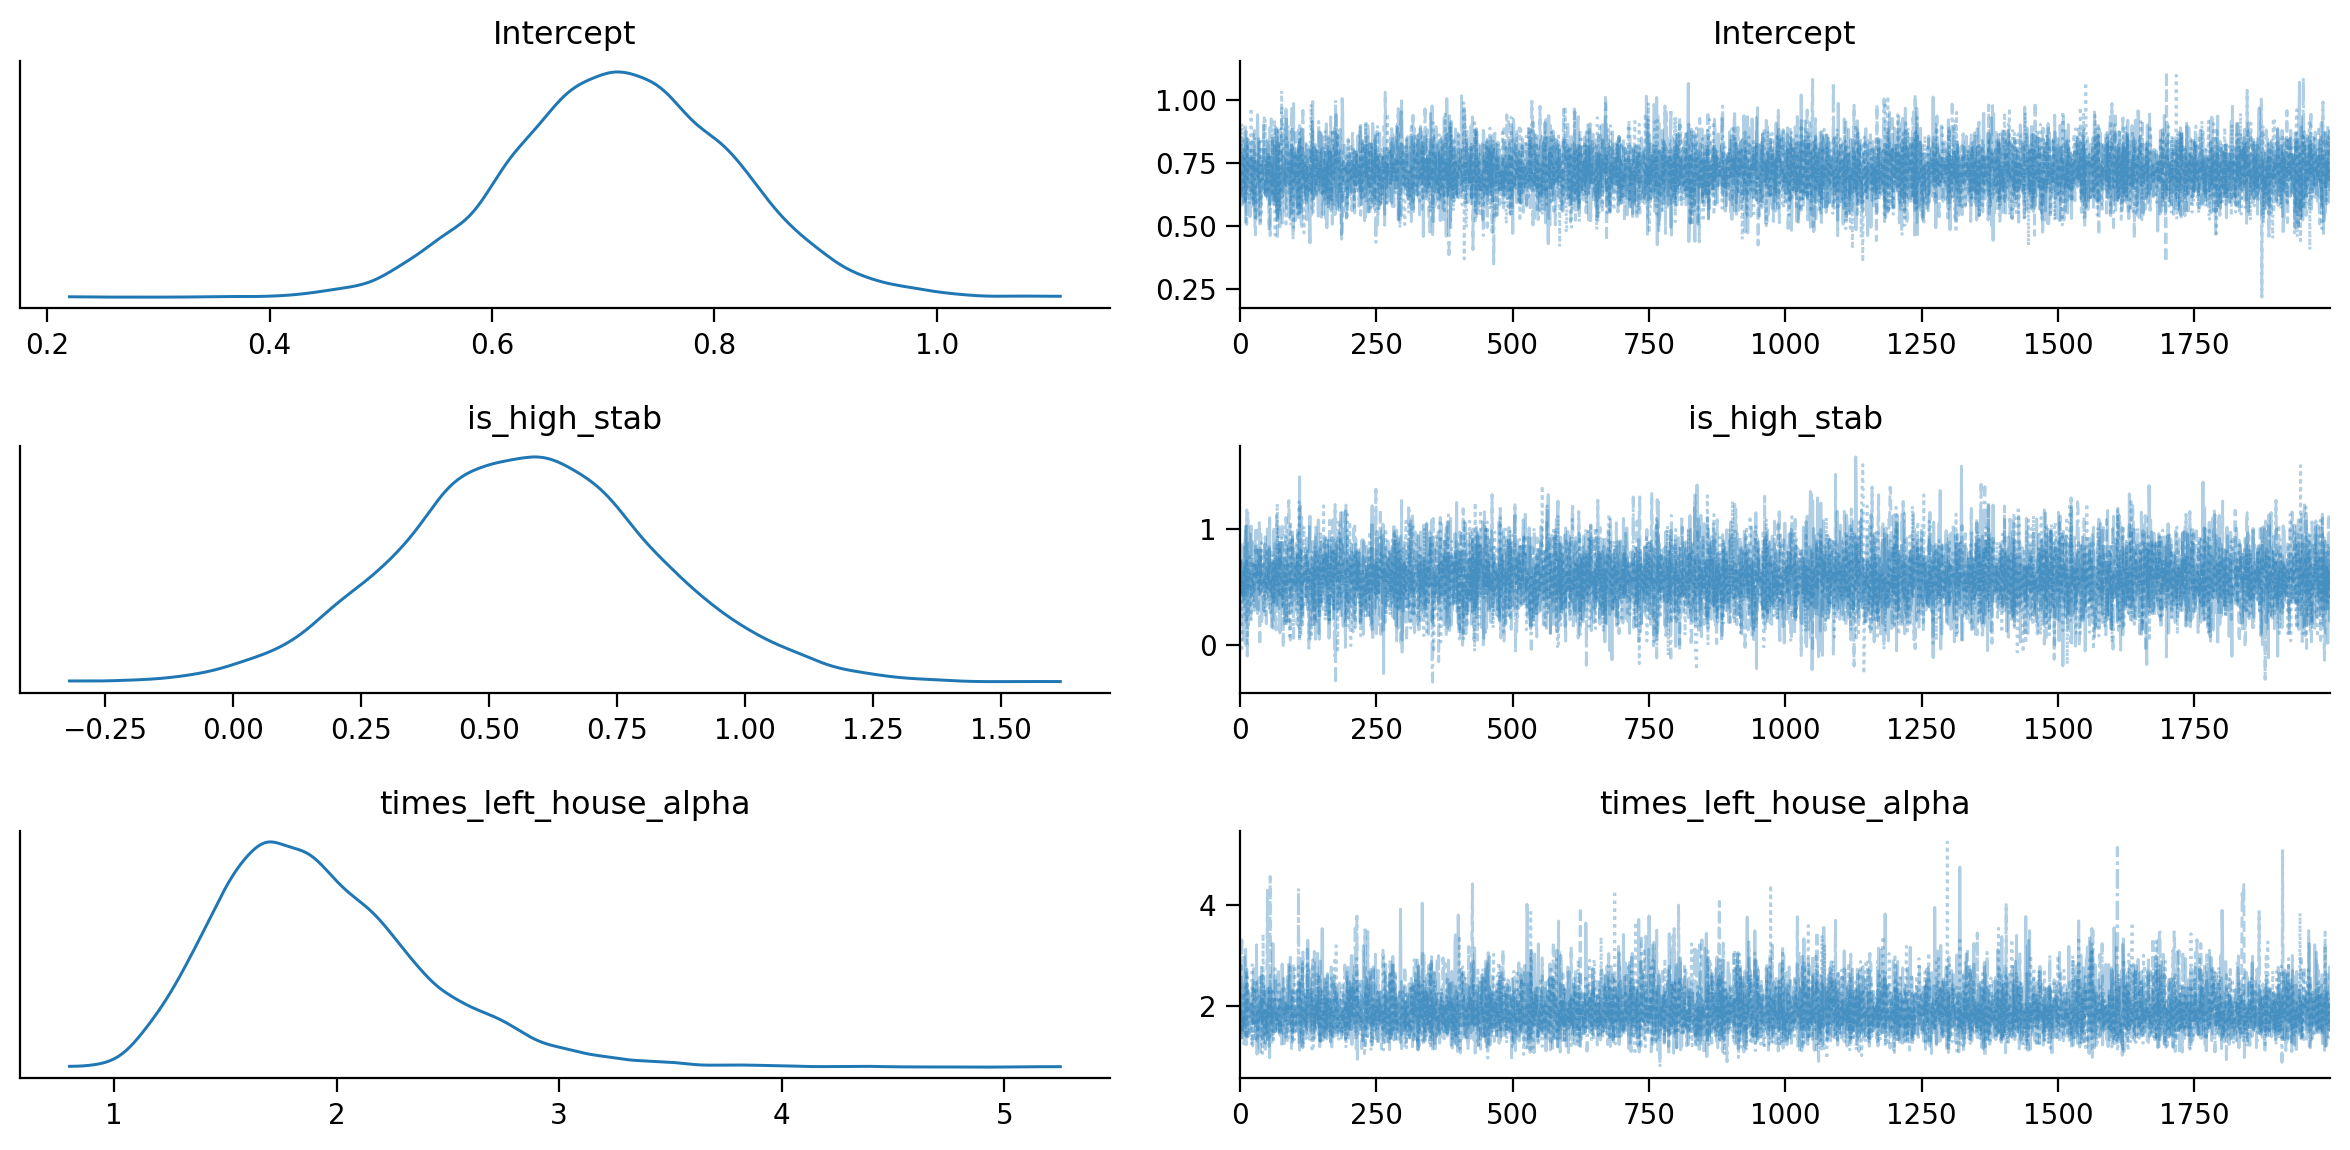

In [30]:
az.plot_trace(fitted, combined=True);

In [31]:
az.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.717,0.100,0.526,0.899,0.001,0.001,12276.0,6063.0,1.0
is_high_stab,0.577,0.253,0.085,1.043,0.002,0.002,11015.0,6052.0,1.0
times_left_house_alpha,1.940,0.477,1.147,2.816,0.005,0.004,10896.0,6034.0,1.0


L'intercetta denota il logaritmo naturale del tasso di eventi (intensità) previsto quando tutte le variabili esplicative sono poste a zero. Per comprenderne l'effetto sulla scala naturale, è necessario eseguire l'esponenziazione del valore stimato dell'intercetta. Nel contesto attuale, questo valore corrisponde al numero stimato di occasioni in cui l'individuo ha lasciato la propria abitazione nella settimana precedente, qualora appartenga al gruppo caratterizzato da valori bassi di STAB (Antisocial Behavior Score).

In [32]:
np.exp(0.715)

2.0441866822585566

Nel contesto di un modello negative binomial, i coefficienti stimati per le variabili esplicative rappresentano la variazione percentuale prevista nel tasso di eventi in risposta a un aumento unitario nella variabile indipendente, mantenendo costanti le altre variabili. Questi coefficienti vengono interpretati sulla scala logaritmica. Per comprendere l'effetto delle variabili esplicative sulla scala naturale, è essenziale calcolare l'esponenziale del coefficiente stesso. Nel caso dei dati in esame, la pendenza indica la differenza nel valore medio di Y (la variabile di risposta) tra i due gruppi: in altre parole, essa rappresenta di quante volte in più (considerando il segno positivo) il gruppo con valori elevati di STAB lascia la propria abitazione nella settimana precedente rispetto al gruppo con valori bassi di STAB.

In [33]:
np.exp(0.715 + 0.580)

3.6509959741412716

Poiché l'intervallo di credibilità del parametro "is_high_stab" non include lo 0, possiamo affermare con un livello di confidenza soggettiva del 94% che gli individui con valori STAB alti hanno lasciato la propria abitazione un numero di volte superiore nella settimana precedente rispetto agli individui con valori STAB bassi.

Esaminiamo la distribuzione predittiva a posteriori.

In [34]:
posterior_predictive = model.predict(fitted, kind="pps")
fitted

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

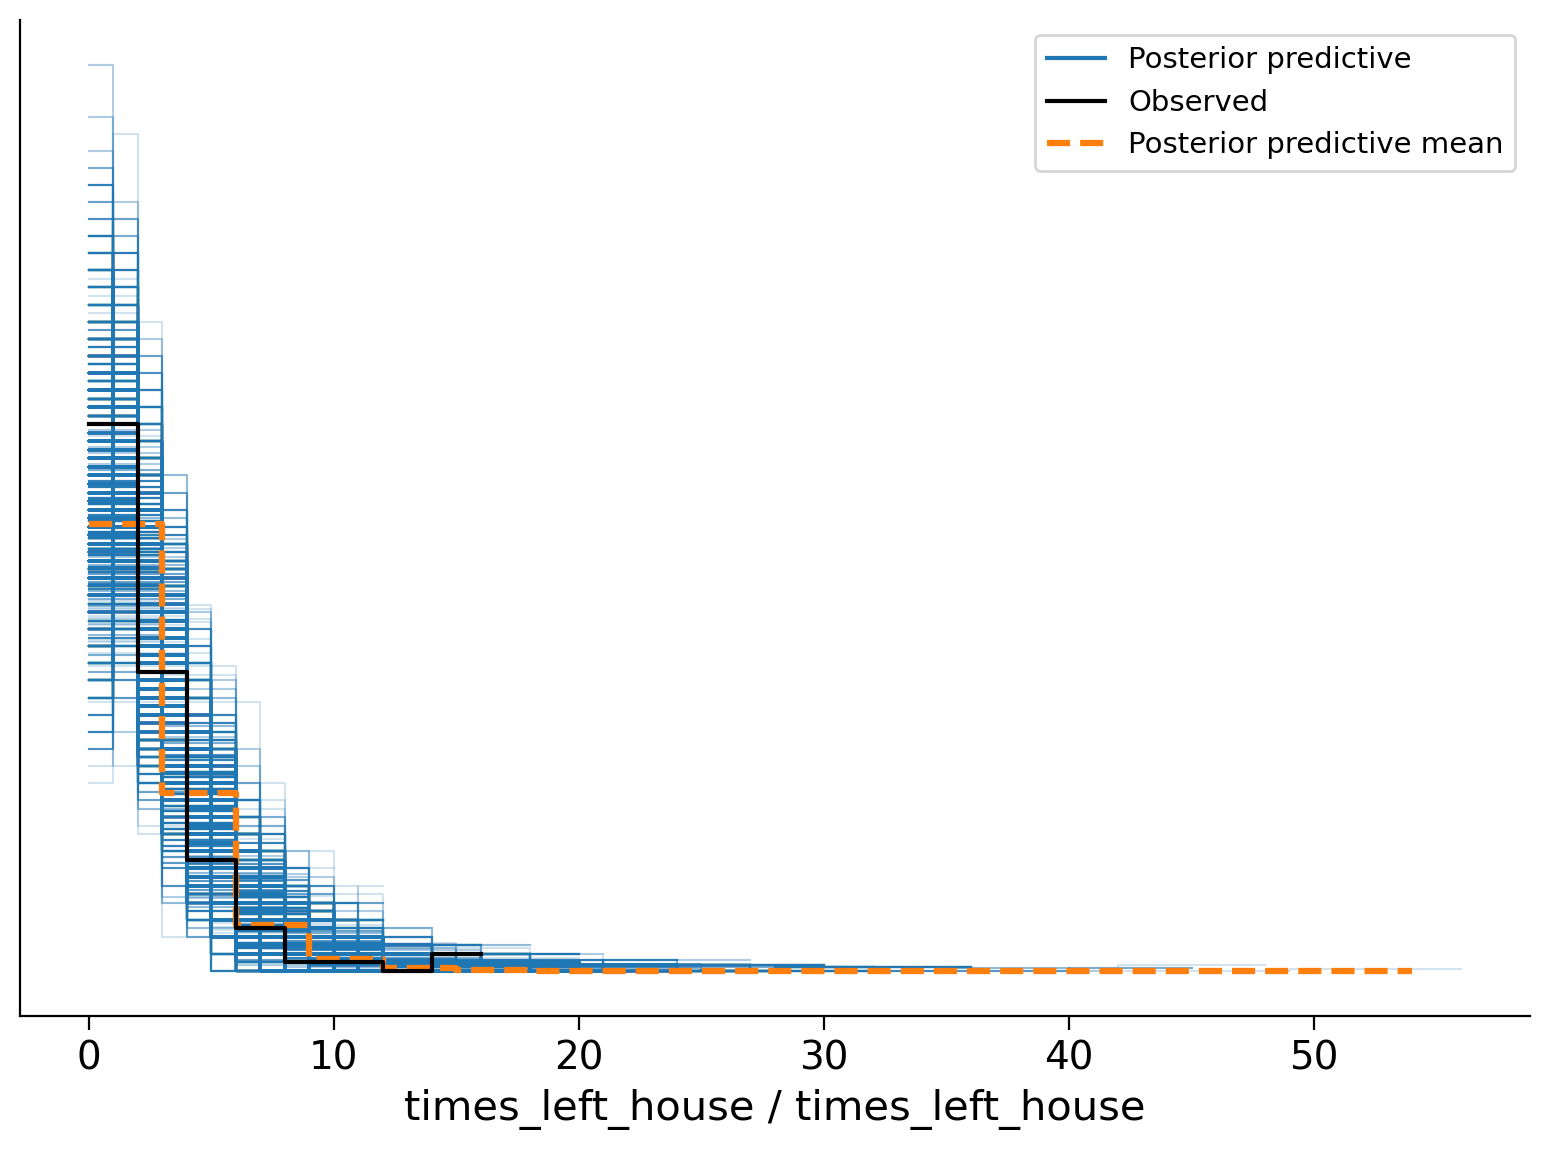

In [35]:
az.plot_ppc(fitted);

Il PP-Check indica che il modello è adeguato per i dati presenti.